In [2]:
#code to split dataset into test and train in the ratio 0.8 and 0.2
#import splitfolders
#splitfolders.ratio("F:/Mini-Project/prakash-Dataset/Dataset", output="F:/BreastCancer", seed=1337, ratio=(.8, .1,.1), group_prefix=None)

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224, 3]

In [5]:
#train_path = 'F:/VGG161/train'
#F:\normalised-aug
train_path = 'F:/normalised-aug/train'

#valid_path = 'F:/VGG161/test'
valid_path = 'F:/normalised-aug/val'

test_path='F:/normalised-aug/test'

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE , weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

In [7]:

    
from tensorflow import keras
from tensorflow.keras import layers


from keras import layers, models, optimizers


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

opt = keras.optimizers.Adam(learning_rate=0.001)
#model.compile(loss='binary_crossentropy', optimizer=opt)


model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
   train_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=16,
    class_mode='binary')

Found 4124 images belonging to 2 classes.
Found 1586 images belonging to 2 classes.
Found 635 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=16)

print("Training Done")
model.save("vgg16_Final_18.h5")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
20/20 [==============================] - 217s 11s/step - loss: 11.8660 - acc: 0.6219 - val_loss: 2.0980 - val_acc: 0.7617
Epoch 2/30
20/20 [==============================] - 213s 11s/step - loss: 2.5626 - acc: 0.7312 - val_loss: 2.5684 - val_acc: 0.7188
Epoch 3/30
20/20 [==============================] - 213s 11s/step - loss: 1.6462 - acc: 0.7969 - val_loss: 1.2966 - val_acc: 0.8242
Epoch 4/30
20/20 [==============================] - 213s 11s/step - loss: 1.3487 - acc: 0.8438 - val_loss: 1.1947 - val_acc: 0.8555
Epoch 5/30
20/20 [==============================] - 213s 11s/step - loss: 1.1529 - acc: 0.8625 - val_loss: 0.6703 - val_acc: 0.8438
Epoch 6/30
20/20 [==============================] - 215s 11s/step - loss: 0.7722 - acc: 0.8813 - val_loss: 0.4671 - val_acc: 0.8750
Epoch 7/30
20/20 [==============================] - 217s 11s/step - loss: 0.9680 - acc: 0.8354 - val_loss: 0.4095 - val_acc: 0.9102

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

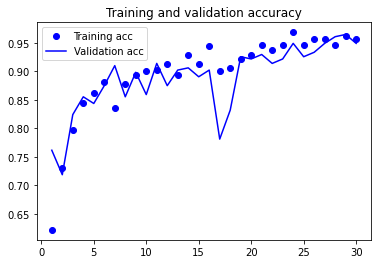

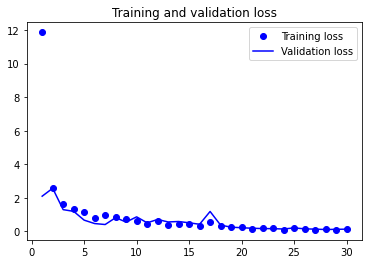

In [11]:
plot_accuracy_and_loss(history)

In [12]:

test_generator = test_datagen.flow_from_directory(test_path,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=5,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=90)
print('test acc:', test_acc)

Found 635 images belonging to 2 classes.
90/90 [==============================] - 168s 2s/step - loss: 0.1882 - acc: 0.9378
test acc: 0.9377777576446533


In [7]:
import tensorflow as tf

from keras.models import load_model
from keras.preprocessing import image
path='F:/Dataset/5.png'




AttributeError: partially initialized module 'pandas' has no attribute 'compat' (most likely due to a circular import)

0
Benign


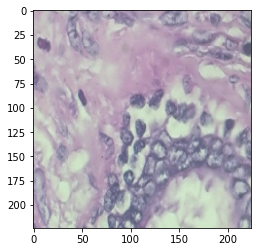

In [23]:
path='F:/4.png'
img = image.load_img(path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

 
x=saved_model.predict(img)
x=int(x)
print(x)

if x>0:
  print( "Malignant")
else:
  print("Benign")
